In [4]:
import torch
import numpy
# ckpt = './experiment/train/v2/ckpt_foundation_add_val_with_audio_v_10_5/model_epoch_950.pth'
# from train import Network
# foundation_model = Network().to(torch.device('cuda'))
# foundation_model.load_state_dict(torch.load(ckpt))
# foundation_model.eval()

In [1]:
import pickle
path = './dataset/pickle/v2/greedy(val_angle)/e9zR4mvMWw7/804341.pkl'
with open(path , 'rb') as f:
    data = pickle.load(f)

/home/getuanhui/anaconda3/envs/ss/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from train import AVtrans
visual = []
audios = []
for d in data['obs']:
    visual.append(torch.from_numpy(d['rgb']).float())
    audio = d['spectrogram'][1]
    audios.append(AVtrans.mel_audio(audio))
visual = torch.stack(visual).to('cuda')
audio = torch.stack(audios).to('cuda')


In [78]:
action , angle = foundation_model(audio , visual)

In [79]:
torch.argmax(action , dim = 1)

tensor([1, 1, 1, 3, 1, 3, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 0], device='cuda:0')

In [80]:
numpy.array(data['action_id'][0])

array([1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 3, 1, 1, 2, 1, 0])

In [81]:
preds = action.argmax(dim=1)  # [batch]

In [87]:
preds == data['action_id'][0]

False

In [6]:
correct = ( action.argmax(dim=1)[:-1] == torch.tensor(data['action_id'][0]).to('cuda')).sum().item()

NameError: name 'action' is not defined

In [91]:
correct

21

In [92]:
len(data['obs'])

33

In [ ]:
[3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
[3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0]

In [56]:
print(f"predict action is {torch.argmax(action , dim=1)} ,grandtruth is {data['action_id'][0]},\npredict angle is {angle.item()},grandtruth is {data['obs'][2]['angle'][1]}")

RuntimeError: a Tensor with 18 elements cannot be converted to Scalar

In [ ]:
angle

In [ ]:
len(data['obs']) / 3

18

In [22]:
import numpy as np
from PIL import Image


In [8]:
import pickle
with open('val_loader.pkl' , 'rb') as f:
    data = pickle.load(f)

In [11]:
for batch in data:
    batch_visual, batch_audio, batch_action , batch_angle = batch
    break

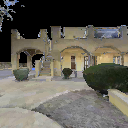

In [41]:
Image.fromarray((batch_visual[12].numpy() * 255).astype(np.uint8))

In [45]:
audio[0]

tensor([[[-80.0000, -76.6446, -53.2768,  ..., -80.0000, -80.0000, -80.0000],
         [-80.0000, -73.6990, -53.7427,  ..., -70.4090, -77.6059, -80.0000],
         [-80.0000, -74.3179, -62.9438,  ..., -67.7027, -74.8325, -80.0000],
         ...,
         [-80.0000, -80.0000, -80.0000,  ..., -80.0000, -80.0000, -80.0000],
         [-80.0000, -80.0000, -80.0000,  ..., -80.0000, -80.0000, -80.0000],
         [-80.0000, -80.0000, -80.0000,  ..., -80.0000, -80.0000, -80.0000]],

        [[-80.0000, -76.6444, -53.2699,  ..., -80.0000, -80.0000, -80.0000],
         [-80.0000, -73.7819, -53.6622,  ..., -70.2378, -78.1260, -80.0000],
         [-80.0000, -74.4999, -62.8331,  ..., -67.4482, -75.2963, -80.0000],
         ...,
         [-80.0000, -80.0000, -80.0000,  ..., -80.0000, -80.0000, -80.0000],
         [-80.0000, -80.0000, -80.0000,  ..., -80.0000, -80.0000, -80.0000],
         [-80.0000, -80.0000, -80.0000,  ..., -80.0000, -80.0000, -80.0000]]],
       device='cuda:0')